# Part 3
## Task 1
See **vanilla_rnn.py** and **train.py** for detail.
## Task 2

In [14]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import argparse

from dataset import PalindromeDataset
from vanilla_rnn import VanillaRNN
from train import train


In [15]:
parser = argparse.ArgumentParser()

# Model params
parser.add_argument('--input_length', type=int, default=10, help='Length of an input sequence')
parser.add_argument('--input_dim', type=int, default=1, help='Dimensionality of input sequence')
parser.add_argument('--num_classes', type=int, default=10, help='Dimensionality of output sequence')
parser.add_argument('--num_hidden', type=int, default=128, help='Number of hidden units in the model')
parser.add_argument('--batch_size', type=int, default=128, help='Number of examples to process in a batch')
parser.add_argument('--learning_rate', type=float, default=0.001, help='Learning rate')
parser.add_argument('--train_steps', type=int, default=10000, help='Number of training steps')
parser.add_argument('--max_norm', type=float, default=10.0)

config, _ = parser.parse_known_args()

In [16]:
lengths = [5, 7, 9, 11, 13, 15, 20, 25, 30]
accs = []
for length in lengths:
    config.input_length = length
    acc = train(config)
    acc_avg = np.mean(acc[-100:])
    accs.append(acc_avg)
for i in range(len(lengths)):
    print(f'Palindrome length: {lengths[i]}, Accuracy: {accs[i]:.4f}')

/Users/tang2004/Desktop/南方科技大学/学习/专业/选修/深度学习/作业/2/Assignment2 - CNN&RNN/Part 3/train.py:48: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(model.parameters(), max_norm=config.max_norm)


Length: 5, Step: 0, Loss: 2.8289, Accuracy: 0.0938
Length: 5, Step: 10, Loss: 2.1075, Accuracy: 0.1484
Length: 5, Step: 20, Loss: 1.7634, Accuracy: 0.1953
Length: 5, Step: 30, Loss: 1.5285, Accuracy: 0.3906
Length: 5, Step: 40, Loss: 1.6355, Accuracy: 0.3203
Length: 5, Step: 50, Loss: 1.5256, Accuracy: 0.3984
Length: 5, Step: 60, Loss: 1.4014, Accuracy: 0.3906
Length: 5, Step: 70, Loss: 1.4433, Accuracy: 0.3594
Length: 5, Step: 80, Loss: 1.4519, Accuracy: 0.3828
Length: 5, Step: 90, Loss: 1.4004, Accuracy: 0.3984
Length: 5, Step: 100, Loss: 1.3687, Accuracy: 0.3828
Length: 5, Step: 110, Loss: 1.2750, Accuracy: 0.5000
Length: 5, Step: 120, Loss: 1.4142, Accuracy: 0.3438
Length: 5, Step: 130, Loss: 1.3079, Accuracy: 0.4609
Length: 5, Step: 140, Loss: 1.2554, Accuracy: 0.4531
Length: 5, Step: 150, Loss: 1.2548, Accuracy: 0.4922
Length: 5, Step: 160, Loss: 1.1607, Accuracy: 0.4844
Length: 5, Step: 170, Loss: 1.3120, Accuracy: 0.3984
Length: 5, Step: 180, Loss: 1.2051, Accuracy: 0.4844
Leng

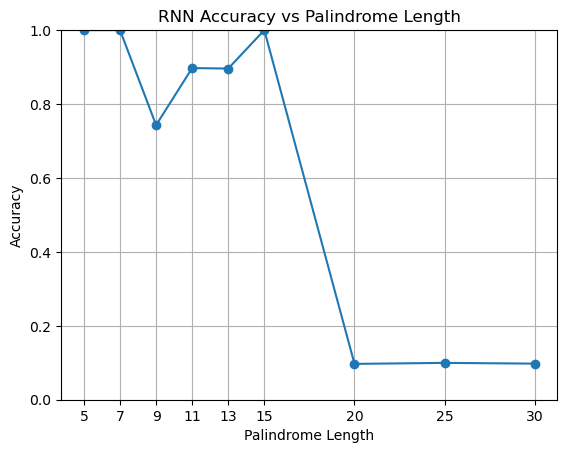

In [26]:
plt.figure()
plt.plot(lengths, accs, marker='o')
plt.title('RNN Accuracy vs Palindrome Length')
plt.xlabel('Palindrome Length')
plt.ylabel('Accuracy')
plt.xticks(lengths)
plt.ylim(0, 1)
plt.grid()
plt.show()